In [1]:
import json
from StringIO import StringIO
import pandas as pd
import numpy as np
import datetime
from scipy.stats import ttest_ind, f_oneway 
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Upload most recent file
listings = pd.read_csv('Datasources/listings_augmented/listings_augmented_2018-05-31_V3.csv', low_memory=False)
#Dropping the rows identified in featuresExploration notebook:
listings = listings.drop(listings.index[4216:4219])
listings.index = range(len(listings))

In [3]:
listings

,description-Topic0,description-Topic1,description-Topic2,description-Topic3,description-Topic4,description-Topic5,description-Topic6,description-Topic7,description-Topic8,description-Topic9,...,park_type,closest_park_full_name_enc,park_type_enc,all_events_within_1_km_at_min_distance_bin,all_events_within_3_km_at_min_distance_bin,all_events_within_5_km_at_min_distance_bin,days_since_host,calendar_updated_numeric,amenity_level,amenity_level_enc
0,0.0,0.32,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,Community Park,12.0,1.0,0.0,0.0,0.0,322.0,14.0,high,0.0
1,0.0,0.0,0.00,0.00,0.0,0.0,0.21,0.00,0.05,0.09,...,Neighborhood Park,238.0,3.0,0.0,0.0,1.0,86.0,7.0,high,0.0
2,0.12,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,Neighborhood Park,238.0,3.0,0.0,0.0,0.0,1276.0,28.0,high,0.0
3,0.28,0.12,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,Neighborhood Park,238.0,3.0,0.0,0.0,0.0,1276.0,28.0,high,0.0
4,0.0,0.17,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,Neighborhood Park,238.0,3.0,0.0,0.0,0.0,777.0,152.0,high,0.0
5,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,Neighborhood Park,238.0,3.0,0.0,0.0,0.0,777.0,35.0,high,0.0
6,0.0,0.1,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,Neighborhood Park,238.0,3.0,0.0,0.0,0.0,777.0,152.0,high,0.0
7,0.0,0.04,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,Neighborhood Park,238.0,3.0,0.0,0.0,0.0,352.0,0.0,mid_level,2.0
8,0.28,0.0,0.00,0.06,0.0,0.0,0.0,0.00,0.00,0.06,...,Neighborhood Park,238.0,3.0,0.0,0.0,1.0,45.0,35.0,high,0.0
9,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,Neighborhood Park,238.0,3.0,0.0,0.0,0.0,230.0,60.0,high,0.0


In [4]:
listings_original = pd.read_csv('Datasources/inside_airbnb/listings.csv')
calendar_original = pd.read_csv('Datasources/inside_airbnb/calendar.csv')

In [5]:
listings_original

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11204286,https://www.airbnb.com/rooms/11204286,20160706203047,2016-07-07,Family friendly/California king,"Aquatica Waterpark, Sleep train Amphitheater, ...","Walking to Aquatica Waterpark, Sleep train Amp...","Aquatica Waterpark, Sleep train Amphitheater, ...",none,NaN,...,10.0,f,NaN,"SAN DIEGO, SAN DIEGO TOURISM MARKETING DISTRIC...",f,moderate,f,f,2,4.57
1,7972006,https://www.airbnb.com/rooms/7972006,20160706203047,2016-07-07,Welcome to Sunset Suite,Your spacious room awaiting is with a Queen Si...,NaN,Your spacious room awaiting is with a Queen Si...,none,Getting around is easy. Very close to Eastlake...,...,10.0,f,NaN,NaN,f,strict,f,f,1,0.76
2,7727710,https://www.airbnb.com/rooms/7727710,20160706203047,2016-07-07,San Diego/Eastlake. Gated community,"This is an immaculate 3 bedroom, 2 1/2 bath co...",NaN,"This is an immaculate 3 bedroom, 2 1/2 bath co...",none,NaN,...,8.0,f,NaN,NaN,f,flexible,f,f,1,0.09
3,13124681,https://www.airbnb.com/rooms/13124681,20160706203047,2016-07-07,Townhome in Eastlake,This 2 Story TownHome is close to Otay Ranch ...,"My place is good for couples, business travele...",This 2 Story TownHome is close to Otay Ranch ...,none,"Located in eastern Chula Vista, Otay Ranch is ...",...,10.0,f,NaN,NaN,f,moderate,f,f,1,3.00
4,3469225,https://www.airbnb.com/rooms/3469225,20160706203047,2016-07-07,Bedroom suite in Large new home,Hello; we are offering a private secluded bedr...,"Beautiful, quiet award-winning suburban neighb...",Hello; we are offering a private secluded bedr...,none,"The quiet serenity; near Park and lakes, beaut...",...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
5,877473,https://www.airbnb.com/rooms/877473,20160706203047,2016-07-07,Private Bedroom in Newer Home,"Private Bedroom with full size bed, + futon, p...","Private bedroom with full size Bed, in large n...","Private Bedroom with full size bed, + futon, p...",none,"It is quiet, serene, tranquil, suburban; yet c...",...,10.0,f,NaN,NaN,f,strict,f,f,2,0.63
6,3124507,https://www.airbnb.com/rooms/3124507,20160706203047,2016-07-07,"Great view to mountains,lake,trails","In this beautiful home, located near the Olymp...",The location and view of lake and mountain,"In this beautiful home, located near the Olymp...",none,Like countryside and also near from downtown S...,...,10.0,f,NaN,NaN,f,strict,f,f,3,0.31
7,3432507,https://www.airbnb.com/rooms/3432507,20160706203047,2016-07-07,2 bedrooms with shared bath,In a great house with view on Otay Lakes and ...,"the proximity to lake ,trail and Olympic train...",In a great house with view on Otay Lakes and ...,none,Freedom in nature,...,10.0,f,NaN,NaN,f,strict,f,f,3,0.04
8,3249729,https://www.airbnb.com/rooms/3249729,20160706203047,2016-07-07,Near to Olympic Training center,Beautiful home in the Eastlake community with ...,Location on the border of the town with nice t...,Beautiful home in the Eastlake community with ...,none,"open , quiet, country feeling",...,10.0,f,NaN,NaN,f,strict,f,f,3,0.08
9,11756336,https://www.airbnb.com/rooms/11756336,20160706203047,2016-07-07,Chula Vista Golf Course House,"Feel right at home in our spacious 5BR, 3.5BA ...","Feel right at home in our spacious 5BR, 3.5BA ...","Feel right at home in our spacious 5BR, 3.5BA ...",none,Our home is surrounded by natural beauty. Visi...,...,8.0,f,NaN,NaN,f,strict,f,f,5,0.59


In [6]:
listings_original.columns[7:87]

Index([u'description', u'experiences_offered', u'neighborhood_overview',
       u'notes', u'transit', u'access', u'interaction', u'house_rules',
       u'thumbnail_url', u'medium_url', u'picture_url', u'xl_picture_url',
       u'host_id', u'host_url', u'host_name', u'host_since', u'host_location',
       u'host_about', u'host_response_time', u'host_response_rate',
       u'host_acceptance_rate', u'host_is_superhost', u'host_thumbnail_url',
       u'host_picture_url', u'host_neighbourhood', u'host_listings_count',
       u'host_total_listings_count', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'property_type', u'room_type',
       u'accommodates', u'bathrooms', u'bedrooms', u'beds', u'bed_type',
 

In [7]:
for w in listings.columns:
    if 'price' in w:
        print(w)

price_x
weekly_price
monthly_price
max_price
median_price
min_price
price_y
skew_of_price
stdev_of_price
hol_max_price
hol_median_price
hol_min_price
hol_price
hol_skew_of_price
hol_stdev_of_price
wke_max_price
wke_median_price
wke_min_price
wke_price
wke_skew_of_price
wke_stdev_of_price
wkd_max_price
wkd_median_price
wkd_min_price
wkd_price
wkd_skew_of_price
wkd_stdev_of_price


In [8]:
from sklearn.cluster import KMeans

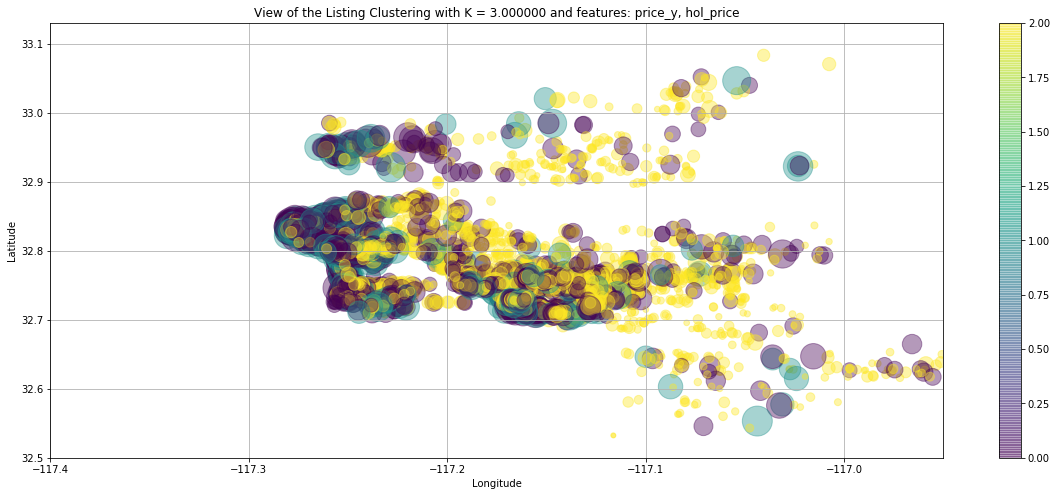

In [26]:
num_clusters = 3
features = ['price_y','hol_price']
kmeans = KMeans(n_clusters = num_clusters, random_state=0).fit(listings[features].dropna())

class_cluster_dictionary = {}

for i in range(num_clusters):
    class_cluster_dictionary[i] = []
    
for i in range(len(listings[features].dropna())):
    key = kmeans.labels_[i]
    w = listings[features].dropna().index.tolist()[i]
    v = listings['id'][w]
    class_cluster_dictionary[key].append(v)
    
colors = kmeans.labels_
    
fig, ax = plt.subplots(figsize = (20, 8))
j = listings[['longitude', 'latitude', 'price_y','hol_price']].dropna()
l = ax.scatter(j['longitude'], j['latitude'], s = j['price_y'],
               c = colors, alpha=.4)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim((-117.4, -116.95))
ax.set_ylim((32.5, 33.13))
ax.set_title('View of the Listing Clustering with K = %f and features: %s'%(num_clusters, ", ".join(features)))
ax.grid(True)
plt.show()

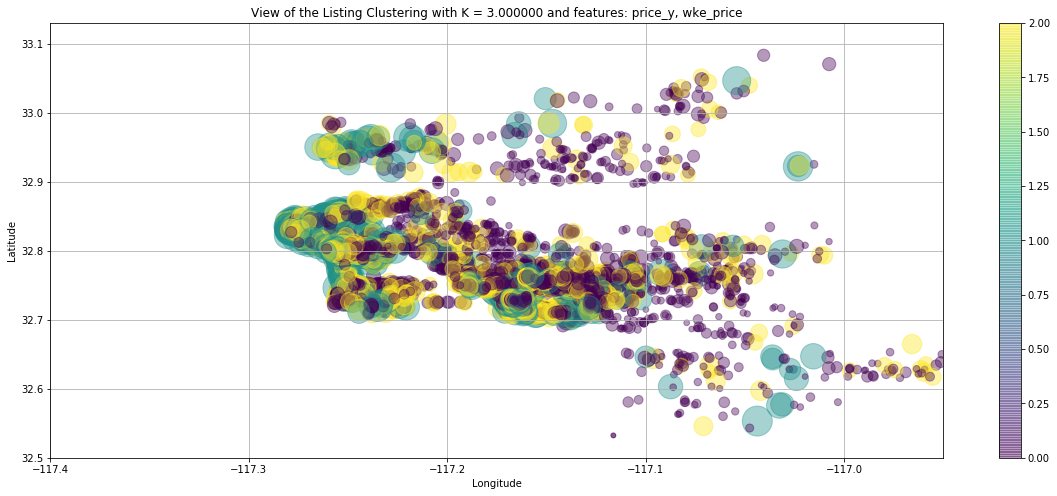

In [27]:
num_clusters = 3
features = ['price_y','wke_price']
kmeans = KMeans(n_clusters = num_clusters, random_state=0).fit(listings[features].dropna())

class_cluster_dictionary = {}

for i in range(num_clusters):
    class_cluster_dictionary[i] = []
    
for i in range(len(listings[features].dropna())):
    key = kmeans.labels_[i]
    w = listings[features].dropna().index.tolist()[i]
    v = listings['id'][w]
    class_cluster_dictionary[key].append(v)
    
colors = kmeans.labels_
    
fig, ax = plt.subplots(figsize = (20, 8))
j = listings[['longitude', 'latitude'] + features].dropna()
l = ax.scatter(j['longitude'], j['latitude'], s = j['price_y'],
               c = colors, alpha=.4)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim((-117.4, -116.95))
ax.set_ylim((32.5, 33.13))
ax.set_title('View of the Listing Clustering with K = %f and features: %s'%(num_clusters, ", ".join(features)))
ax.grid(True)
plt.show()

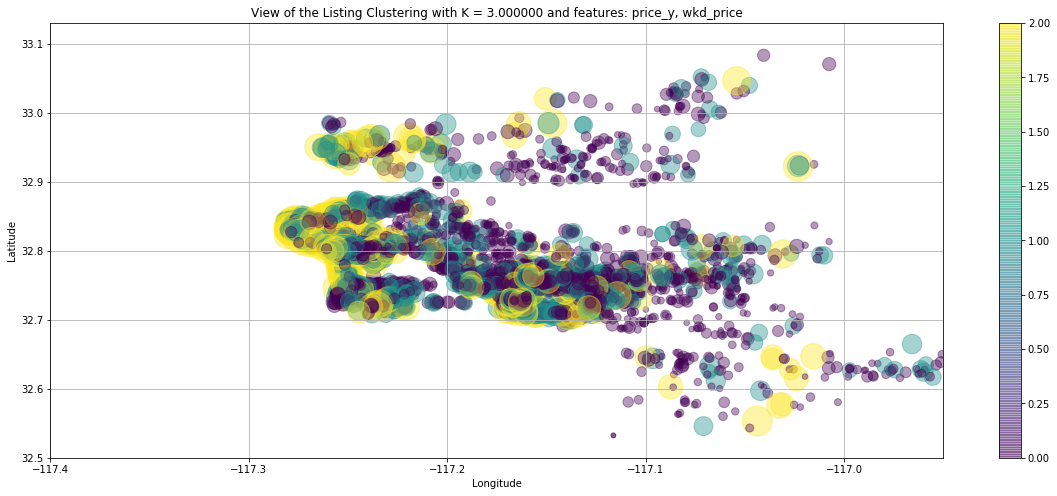

In [28]:
num_clusters = 3
features = ['price_y','wkd_price']
kmeans = KMeans(n_clusters = num_clusters, random_state=0).fit(listings[features].dropna())

class_cluster_dictionary = {}

for i in range(num_clusters):
    class_cluster_dictionary[i] = []
    
for i in range(len(listings[features].dropna())):
    key = kmeans.labels_[i]
    w = listings[features].dropna().index.tolist()[i]
    v = listings['id'][w]
    class_cluster_dictionary[key].append(v)
    
colors = kmeans.labels_
    
fig, ax = plt.subplots(figsize = (20, 8))
j = listings[['longitude', 'latitude'] + features].dropna()
l = ax.scatter(j['longitude'], j['latitude'], s = j['price_y'],
               c = colors, alpha=.4)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim((-117.4, -116.95))
ax.set_ylim((32.5, 33.13))
ax.set_title('View of the Listing Clustering with K = %f and features: %s'%(num_clusters, ", ".join(features)))
ax.grid(True)
plt.show()

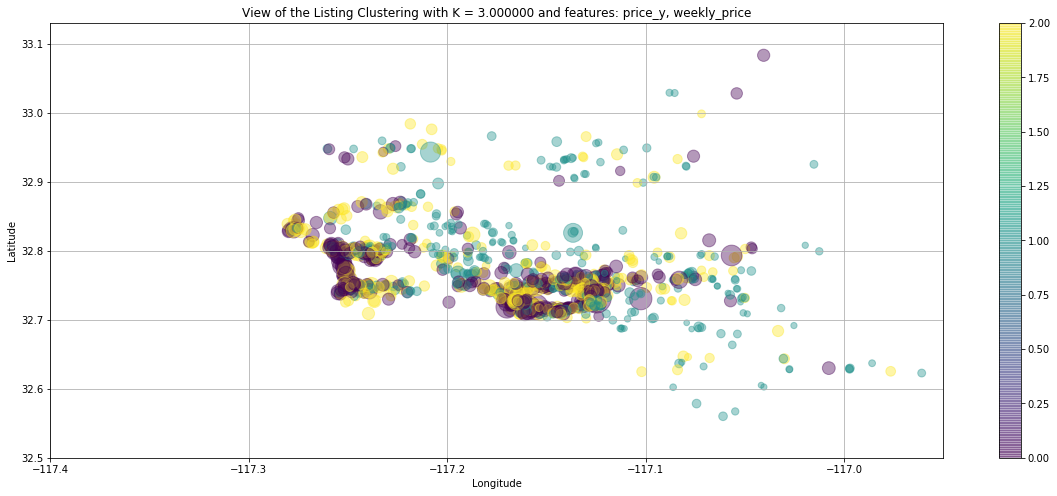

In [29]:
num_clusters = 3
features = ['price_y','weekly_price']
kmeans = KMeans(n_clusters = num_clusters, random_state=0).fit(listings[features].dropna())

class_cluster_dictionary = {}

for i in range(num_clusters):
    class_cluster_dictionary[i] = []
    
for i in range(len(listings[features].dropna())):
    key = kmeans.labels_[i]
    w = listings[features].dropna().index.tolist()[i]
    v = listings['id'][w]
    class_cluster_dictionary[key].append(v)
    
colors = kmeans.labels_
    
fig, ax = plt.subplots(figsize = (20, 8))
j = listings[['longitude', 'latitude'] + features].dropna()
l = ax.scatter(j['longitude'], j['latitude'], s = j['price_y'],
               c = colors, alpha=.4)
fig.colorbar(l)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim((-117.4, -116.95))
ax.set_ylim((32.5, 33.13))
ax.set_title('View of the Listing Clustering with K = %f and features: %s'%(num_clusters, ", ".join(features)))
ax.grid(True)
plt.show()